#### Machine Learning Systems
#

## Naive Bayes and KNN
##  Solutions


This week, we will be using `scikit-learn` to classify some data, and to evaluate our classifiers.

Scikit-learn is a popular Python library for machine learning that provides a wide range of tools for data preprocessing, modeling, and evaluation. It is built on top of NumPy, SciPy, and Matplotlib, and is designed to be easy to use and efficient for both small and large-scale machine learning tasks.

Scikit-learn includes a variety of machine learning algorithms, such as classification, regression, clustering, and dimensionality reduction, and provides a consistent API for using these algorithms. It also includes tools for feature extraction, selection, and scaling, as well as for evaluating and optimizing machine learning models.



In [1]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt


The dataset we are using today is called Car evaluation and it is originally sources from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data).

You have given two sets of data:
- *car.train.data*
- *car.test.data*

We are going to use the first one for training our models and the secons one for testing.

These datasets have 6 attributes and 1 target label (class).
- **buying:** has values ['high'=0 'low'=1 'med'=2 'vhigh'=3]
- **maint:** has values ['high'=0 'low'=1 'med'=2 'vhigh'=3]
- **doors:** has values ['2'=0 '3'=1 '4'=2 '5more'=3]
- **persons:** has values ['2'=0 '4'=1 'more'=2]
- **lug_boot:** has values ['big'=0 'med'=1 'small'=2]
- **safety:** has values ['high'=0 'low'=1 'med'=1]

The target label (class) also has 4 values ['unacc' 'acc' 'good' 'v-good']

### Exercise 1.

The common terminology in scikit-learn is that the array defining the attribute values is called X and the array defining the gold–standard (“ground truth”) labels is called y ; create these variables for the car data.

- **(a)** Load the data into a suitable format for scikit-learn:


In [2]:
train = pd.read_csv('G:/My Drive/SEM-SUMMER-2024/MachineLearning/Coding/Week5 Naive Bayes/car.train.data')
X_train = train.iloc[:, :-1]
y_train = train.iloc[:,-1]

print("Top 5 rows of train dataset ")
print(train.head(5))

test = pd.read_csv('G:/My Drive/SEM-SUMMER-2024/MachineLearning/Coding/Week5 Naive Bayes/car.test.data')
X_test = test.iloc[:, :-1]
y_test = test.iloc[:,-1]

print("\nTop 5 rows of test dataset ")
print(test.head(5))

Top 5 rows of train dataset 
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      3        2         2       0  unacc
1       0      1      3        0         0       2  unacc
2       1      3      2        1         2       0    acc
3       1      2      2        2         2       1  unacc
4       0      0      0        2         0       0    acc

Top 5 rows of test dataset 
   buying  maint  doors  persons  lug_boot  safety  class
0       1      3      1        2         0       0    acc
1       2      2      2        0         0       0  unacc
2       2      1      0        2         0       0  vgood
3       2      1      1        1         2       2    acc
4       0      1      0        1         1       1  unacc


- **(b)** How many instances are there in each dataset? Make a visualization of the label distribution in each dataset.

Number of instances in train dataset: 1209
Number of instances in test dataset: 519


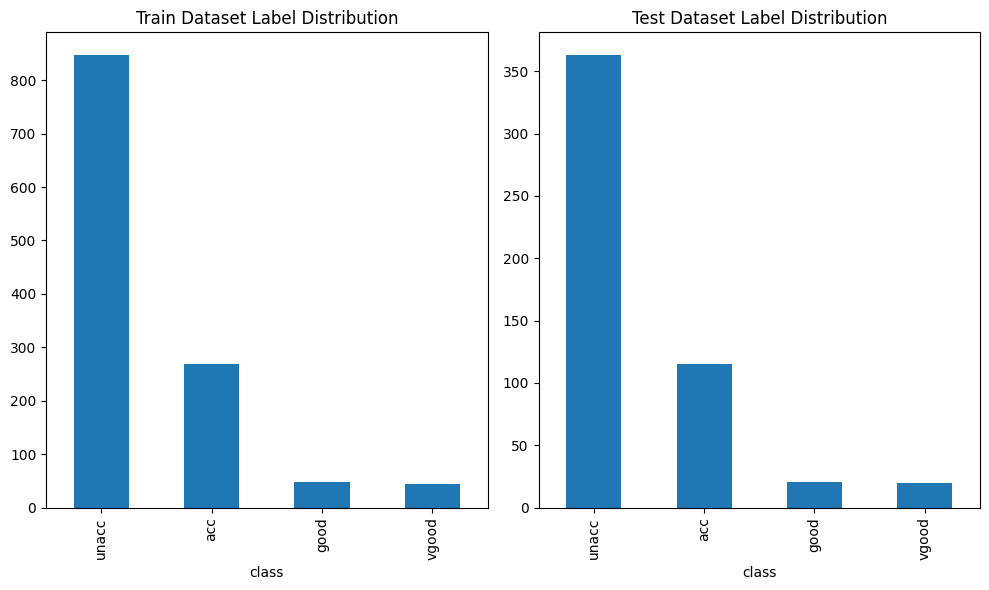

In [3]:
# Print the number of instances in each dataset
print("Number of instances in train dataset:", len(train))
print("Number of instances in test dataset:", len(test))

# Create a visualization of the label distribution in each dataset
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
train['class'].value_counts().plot(kind='bar')
plt.title('Train Dataset Label Distribution')

plt.subplot(1, 2, 2)
test['class'].value_counts().plot(kind='bar')
plt.title('Test Dataset Label Distribution')

plt.tight_layout()
plt.show()



### Exercise 2.
- **(a)** Use the train data to fit(train) a Multinomial Naive Bayes classifier. Then use the trained model to predict the labels for the instances in our test set. Report the accuracy of your model.

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict labels for the instances in the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the Multinomial Naive Bayes classifier:", accuracy)

Accuracy of the Multinomial Naive Bayes classifier: 0.7032755298651252


- **(b)** Develop the confusion matrix plot for this evaluation.

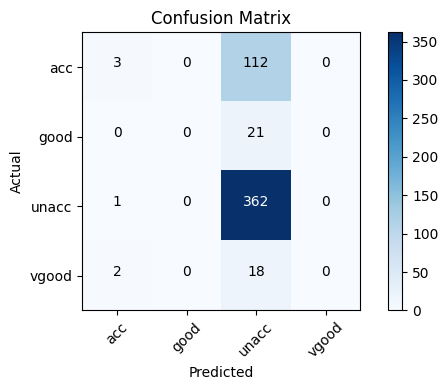

In [5]:
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a visualization of the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adding annotations to the heatmap
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

- **(c)** The default smoothing parameter for the Multinomial Naive Bayes (MNB) classifier in scikit-learn is 1.0. What happens if we change the smoothing parameter ($\alpha$)? Calculate the accuracy for a range of values from 0.5 to 500. For the very large values, examine the predicted classes for the test instances — what is happening?

In [6]:
Alpha_list = [0.05,0.5,5,50,100,500]

for i in Alpha_list:
    #change the alpha
    mnb = MultinomialNB(alpha=i)
    
    #train the model
    mnb.fit(X_train, y_train)
    # Predict labels for the instances in the test set
    y_pred = mnb.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    print("\nMNB with aplha =", i ," score is %f " %accuracy)



MNB with aplha = 0.05  score is 0.703276 

MNB with aplha = 0.5  score is 0.703276 

MNB with aplha = 5  score is 0.703276 

MNB with aplha = 50  score is 0.701349 

MNB with aplha = 100  score is 0.699422 

MNB with aplha = 500  score is 0.699422 


`For large values of the smoothing parameter, every instance is predicted to be the majority-class`

### Exercise 3.
- **(a)** Use the train data to fit(train) a K Nearest Neighbour classifier. Then use the trained model to predict the labels for the instances in our test set. Report the accuracy of your model. Set k = 3.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Train a Multinomial Naive Bayes classifier
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict labels for the instances in the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the KNN classifier:", accuracy)

Accuracy of the KNN classifier: 0.8227360308285164


- **(b)** What happens if we change the k? Calculate the accuracy for a range of k values from 3 to 30. Check the accuracy changes.

In [8]:
k_list = [3,5,10,20,30,100]

for k in k_list:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict labels for the instances in the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    print("\nKNN with k =", k ," score is %f " %accuracy)


KNN with k = 3  score is 0.822736 

KNN with k = 5  score is 0.901734 

KNN with k = 10  score is 0.861272 

KNN with k = 20  score is 0.795761 

KNN with k = 30  score is 0.766859 

KNN with k = 100  score is 0.701349 
